# Introduction to Data Science with Python

### The limitations of the built-in python list 

Lists are flexible, dynamic python objects that do their job quite well. But they do not support some mathematical operations in an intuitive way. Consider the summation of two lists, $l_1$ and $l_2$:

In [1]:
l_1 = [1,2,3] # A basic list of ints
l_2 = [3,4,5] # Another basic list of ints
print('Sum of Lists: %s' % (l_1 + l_2))

Sum of Lists: [1, 2, 3, 3, 4, 5]


In fact, the difference of lists throws an error that complains that the difference operation isn't supported at all

In [2]:
print('Difference of Lists: %s' % (l_1 - l_2))

TypeError: unsupported operand type(s) for -: 'list' and 'list'

If we wanted to sum lists elementwise, we could write our own function that does the job entirely within the framework of python

In [3]:
def add_lists(list_1, list_2):
    assert(len(list_1) == len(list_2)) # Lists must be the same length for this to make sense
    length = len(list_1) # can be either
    
    # Main loop
    ret = []
    for i in range(length):
        ret.append(list_1[i] + list_2[i])
    return ret

In [4]:
ans = add_lists(l_1, l_2)
print('Sum of Lists: %s' % ans)

Sum of Lists: [4, 6, 8]


We would have to write a similar function for all the possible operands that we could consider for list arithmatic. This is time consuming and inefficient. Moreover, once the lists in question become nested, mimicing the behavior of true matrices, the problem gets worse. Complicated indexing is necessary, just to allow for the most basic matrix operations common throughout science and engineering. Imagine writing a matrix multiplication function using python syntax in a general way, such that it returns a matrix-matrix or matrix-vector product:

\begin{align}
(n \times x) \times (x \times m) \rightarrow (n \times m)
\end{align}

\begin{align}
\begin{bmatrix}
c_{0,0} & ... & c_{0,n} \\
\vdots & \ddots & \vdots \\
c_{m,0} & ... & c_{m,n}
\end{bmatrix}
=
\begin{bmatrix}
a_{0,0} & ... & a_{0,x} \\
\vdots & \ddots & \vdots \\
a_{n,0} & ... & a_{n,x}
\end{bmatrix}
\begin{bmatrix}
b_{0,0} & ... & b_{0,m} \\
\vdots & \ddots & \vdots \\
b_{x,0} & ... & b_{x,m}
\end{bmatrix}
\end{align}

Let is instantiate a matrix $\mathcal{M}$ and a vector $\vec{v}$ and write a function that does the multiplication ourselves.


In [5]:
def matrix_multiply(A, B):
    ret = [ [0 for i in range(len(B[0]))] for i in range(len(A))] # number of rows in the result
    
    inner_dim = len(A[0])
    n_dim = len(ret)
    m_dim = len(ret[0])
    
    
    for i in range(n_dim):
        for j in range(m_dim):
            element = 0
            for x in range(inner_dim):
                    element += A[i][x] * B[x][j]
            ret[i][j] = element
    
    return ret
M = [[0,1,0],[0,2,0],[0,3,0]]
v = [[1],[2],[3]]

In [6]:
print(matrix_multiply(M, v))

[[2], [4], [6]]


We needed a complex list comprehension and a nontrivial nested list structure to be able to perform the necessary computation. Moreover, the function contains a triple for-loop, this type of code doesn't scale well to large matrix products under the Python memory model. Lastly, writing functions like this for every operation in linear algebra, especially when matrices become tensors, is impractical. NumPy fills this gap with a huge number of fast, amazing functions.

### NumPy and the NDArray

In [7]:
import numpy as np # By convention, this is how NumPy is used

NumPy is based around a class called the $\textit{NDArray}$, which is a flexible vector / matrix class that implements the intuitive matrix and vector arithmatic lacking in basic Python. Let's start by creating some NDArrays:

In [8]:
l_1 = np.array(l_1) # Cast a list explicitly to a NumPy array
l_2 = np.array(l_2)
print('Here is l_1 now: %s' % l_1)
print('Here is the type: %s' % type(l_1))

Here is l_1 now: [1 2 3]
Here is the type: <class 'numpy.ndarray'>


In [9]:
# We can do some intuitive operations now
ans = l_1 + l_2
print('%s + %s = %s' % (l_1, l_2, ans))
ans = l_1 - l_2
print('%s - %s = %s' % (l_1, l_2, ans))

print('\n')

# They support the 'broadcasting' of scalars
print('l_1 + 1 = %s' % (l_1 + 1))

[1 2 3] + [3 4 5] = [4 6 8]
[1 2 3] - [3 4 5] = [-2 -2 -2]


l_1 + 1 = [2 3 4]


### Multidimensional Arrays

NumPy seamlessly supports multidimensional arrays, matrices, and tensors of arbitrary dimension without nesting NDArrays. NDArrays themselves are flexible and extensible and may be defined with such dimensions, with a rich API of common functions to facilitate their use. Let's start by building a two dimensional 3x3 matrix by conversion from a nested group of core python lists $M = [l_0, l_1, l_2]$:

In [10]:
l_0 = [0,1,2]
l_1 = [3,4,5]
l_2 = [6,7,8]
M = [l_0, l_1, l_2]

print('Nested List Structure: %s' % M)

M = np.array(M) # cast directly. Dimensions inferred

print('Nested List Structure after conversion: \n %s' % M)
print('And it\'s type: %s' % type(M))

Nested List Structure: [[0, 1, 2], [3, 4, 5], [6, 7, 8]]
Nested List Structure after conversion: 
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
And it's type: <class 'numpy.ndarray'>


Now, we can use the more intuitive, MATLAB-like indexing syntax to assign and access elements of multidimensional NDArrays:

In [11]:
print('Middle element %s' % M[1,1])

M[1,2] = 1.5 # A float

print('After Assignment: \n %s' % M)

Middle element 4
After Assignment: 
 [[0 1 2]
 [3 4 1]
 [6 7 8]]


Notice how we ended up with a 1 in the target element's place. This is a data type issue. The .dtype() method is supported by all NDArrays, as well as the .astype() method for casting between data types:

In [12]:
t = M.dtype
print('Data type of M: %s' % t)

M = M.astype(np.float64)

t = M.dtype
print('Data type of M: %s' % t)

M[1,2] = 1.5 # A float

print('After Assignment: \n %s' % M)

Data type of M: int32
Data type of M: float64
After Assignment: 
 [[ 0.   1.   2. ]
 [ 3.   4.   1.5]
 [ 6.   7.   8. ]]


### The Shape

The behavior and properties of an NDArray are often sensitively dependent on the $\textit{shape}$ of the NDArray itself. The shape of an array can be found by calling the .shape method, which will return a tuple containing the array's dimensions:

In [13]:
print('Our 2D matrix M: \n %s' % M)
print('Shape:')
print(M.shape)

# As long as the number of elements remains fixed, we can reshape NDArrays at will:
print('Reshaped:')
print(M.reshape( (9,1) ))

# Notice that (9,1) is not the same as (1,9) !!!

print('Alternatively...')
print(M.reshape( (1,9) ))


np.dot((M.reshape((1,9))),M.reshape((9,1)))

Our 2D matrix M: 
 [[ 0.   1.   2. ]
 [ 3.   4.   1.5]
 [ 6.   7.   8. ]]
Shape:
(3, 3)
Reshaped:
[[ 0. ]
 [ 1. ]
 [ 2. ]
 [ 3. ]
 [ 4. ]
 [ 1.5]
 [ 6. ]
 [ 7. ]
 [ 8. ]]
Alternatively...
[[ 0.   1.   2.   3.   4.   1.5  6.   7.   8. ]]


array([[ 181.25]])

With the concept of shape firmly in mind, let's go over some useful functions within the NDArray API.

In [14]:
M = np.zeros(9)
print('A linear array of zeros')
print(M)

M = np.zeros((3,3))
print('A square arrary of zeros')
print(M)

print('A 4x4 array of consecutive integers')

M = np.arange(16)
print('M - linear')
print(M)
M = np.arange(16).reshape((4,4)) # Can build this array rapidly
print('M - reshaped')
print(M)

A linear array of zeros
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.]
A square arrary of zeros
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
A 4x4 array of consecutive integers
M - linear
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
M - reshaped
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


Multidimensional NDArrays support MATLAB-like indexing, with which you can read from or assign to portions of the multidimensional NDArray very easily. 

In [15]:
M = np.zeros((4,4))
print('Before assignment:')
print(M)

M[:,0] = 1
print('After assignment:')
print(M)

print('After assignment again:')
M[2,:] = 5
print(M)

M = M*0 # Reset the matrix 

# We can even do more complicated stuff

M[:, 1:3] = 2
print('A more complex assignment:')
print(M)

x = np.arange(4)
M = M*0

M[:,0] = x
M[2,:] = x-1

print('Assignment using other NDArrays:')
print(M)

Before assignment:
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
After assignment:
[[ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]]
After assignment again:
[[ 1.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 5.  5.  5.  5.]
 [ 1.  0.  0.  0.]]
A more complex assignment:
[[ 0.  2.  2.  0.]
 [ 0.  2.  2.  0.]
 [ 0.  2.  2.  0.]
 [ 0.  2.  2.  0.]]
Assignment using other NDArrays:
[[ 0.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [-1.  0.  1.  2.]
 [ 3.  0.  0.  0.]]


As long as the shapes of NDArrays are 'compatible', they can be multiplied elementwise, broadcasted, used in inner products, and much much more. 'Compatible' in this context can mean compatible in the linear algebraic sense, i.e. for inner products and other matrix multiplication, or simply sharing a dimension in such a manner that broadcasting 'makes sense'. Here are some examples of this:

In [ ]:
M = M*0 # re-initialize
v = np.arange(4).reshape((4,1))

print('M Before:')
print(M)
print('v Before:')
print(v)

M = M + v
print('M After:')
print(M)

Definitely of note is np.where:

In [ ]:
np.where(M == 1) # Find elements of a conditions

In [ ]:
M[np.where(M > 0)] = 1.5
print(M)

# The Pandas Data Analysis Library

In [17]:
import pandas as pd
def make_mystery_dataframe():
    customer_id = np.random.randint(100000,120000,10000)
    
    
    states = {1:'California', 0:'New York'}
    statelist = []
    agelist = []
    for i in range(10000):
        ind = np.random.randint(0, 2)
        if ind == 0:
            statelist.append(states[ind])
            agelist.append(np.random.normal(loc=30, scale=10))
        elif ind == 1:
            statelist.append(states[ind])
            agelist.append(np.random.normal(loc=40, scale=20))
    
    mystery_df = pd.DataFrame.from_dict({'customer_id': customer_id,
                                         'ages':agelist,
                                         'state':statelist})
    
    return mystery_df
            
    
    

Pandas is a flexible data analysis library built on top of NumPy that is excellent for working with tabular data. It is currently the de-facto standard for Python-based data analysis, and fluency in Pandas will do wonders for your productivity and frankly your resume. It is one of the fastest ways of getting from zero to answer in existence. 

### Tabular data structures

The central object of study in Pandas is the DataFrame, which is a tabular data structure with rows and columns like an excel spreadsheet. The first point of discussion is the creation of dataframes both from native Python dictionaries, and text files through the Pandas I/O system.

In [ ]:
import pandas as pd

In [ ]:
names = ['Alice',
         'Bob',
         'James',
         'Beth', 
         'John', 
         'Sally',
         'Richard', 
         'Lauren',
         'Brandon', 
         'Sabrina']

ages = np.random.randint(18,35, len(names))# Some random ages between 18 and 35
my_dict = {'names':names, 'ages':ages}
print(my_dict)

Let's convert our not-so-useful-for-analysis dict into a Pandas dataframe. We can ue the from_dict function to do this easily using Pandas:

In [ ]:
df = pd.DataFrame.from_dict(my_dict)
print('Resulting type: %s' % type(df))
df.head(10) # Displays the first 10 elements of a dataframe

In [ ]:
# The dataframe has a shape property, just like a NumPy matrix. 

print('Dataframe shape:')
print(df.shape)

# It also has an overall length property corresponding to the number of rows.

print('Dataframe length: %s' % len(df))

You can directly select a column of a dataframe just like you would a dict. The result is a Pandas 'Series' object

In [ ]:
print('Type of a column: %s' % type(df['ages']))
print(df['ages'])

# Even though they are more complex series objects, they still support the behavior of the underlying NumPy arrays

print(df['ages'][8])

Along the horizontal dimension, rows of Pandas DataFrames are Row objects. You will notice there is a third column present in the DataFrame - this is the $\textit{index}$. It is automatically generated as a row number, but can be reassigned to a column of your choice using the DataFrame.set_index(colname) method. We can use it to access particular Pandas $\textit{rows}$, which are also Series objects:

In [ ]:
myrow = df.loc[0]
print('Type of myrow: %s' % type(myrow))

print(myrow)

In [ ]:
# A series can support dict-like features when it's used as a DataFrame row. 
myrow.keys()

In [ ]:
print(myrow['ages'])

That said, if you use slicing to grab a section of a dataframe, you'll end up with another DataFrame:

In [ ]:
df[2:5]

The above syntax will work, but be aware, passing as single int will be interpreted as a column key

In [ ]:
df[2] # Will throw a huge key error

It is possible to spend a whole week simply exploring the built-in functions supported by DataFrames in Pandas. Here however, we will simply highlight a few ones that might be useful, to give you an idea of what's possible out of the box with Pandas:

In [ ]:
df.describe() # Collect summary statistics in one line

In [ ]:
df.sort('ages')

In [ ]:
# Sort based on many labels, with left-to-right priority
df.sort(['ages', 'names']).head(10)

### Filtration

Let's look at how to filter dataframes for rows that fulfill a specific conditon.

In [ ]:
df['ages'] > 29 # Conditional boolean dataframe

In [ ]:
df[df['ages'] > 29]

### Column transformations 

Rarely, if ever, will the columns in the original raw dataframe read from CSV or database table be the ones you actually need for your analysis. You will spend lots of time constantly transforming columns or groups of columns using general computational operations to produce new ones that are functions of the old ones. Pandas has full support for this: Consider the following dataframe containing membership term and renewal number for a group of customers:

In [38]:
# Generate some fake data
customer_id = np.random.randint(1000,1100, 10)
renewal_nbr = np.random.randint(0,10,10)
term_in_years = [{1:0.5,0:1}[key] for key in np.random.randint(0,2,10)]

# Create a dict - not usually how you would do this
rand_data = {'customer_id':customer_id, 'renewal_nbr':renewal_nbr, 'term_in_years':term_in_years}

# Build the dataframe
customers = pd.DataFrame.from_dict(rand_data)
customers.head(10)

,customer_id,renewal_nbr,term_in_years
0,1077,9,0.5
1,1067,3,0.5
2,1030,9,0.5
3,1063,7,0.5
4,1010,7,1.0
5,1020,2,1.0
6,1001,1,1.0
7,1028,4,1.0
8,1042,1,1.0
9,1014,4,1.0


In [39]:
customers['customer_tenure'] = customers['renewal_nbr'] * customers['term_in_years']
customers.head(10)

,customer_id,renewal_nbr,term_in_years,customer_tenure
0,1077,9,0.5,4.5
1,1067,3,0.5,1.5
2,1030,9,0.5,4.5
3,1063,7,0.5,3.5
4,1010,7,1.0,7.0
5,1020,2,1.0,2.0
6,1001,1,1.0,1.0
7,1028,4,1.0,4.0
8,1042,1,1.0,1.0
9,1014,4,1.0,4.0


If what you want to do to a column can't be represented by simple mathematical operations, you can write your own $\textit{user defined function}$ with the full customizability available in Python and any external Python packages, then map it directly onto a column. Let's add some ages to our customer dataframe, and then classify them into our custom defined grouping scheme:

In [ ]:
customers['ages'] = np.random.randint(16, 70, 10)

def make_age_groups(age):
    if 10 <= age and 20 > age:
        return 'Teenager'
    if 20 <= age and 35 > age:
        return 'Young Adult'
    if 35 <= age and 65 > age:
        return 'Adult'
    if 65 <= age:
        return 'Senior'
    
customers['age_group'] = customers['ages'].apply(make_age_groups)
customers.head(10)

As a last example I'll show here how you would use a lambda function to create a UDF that depends on $\textit{more than one}$ column:

In [ ]:
def make_loyalty_age_groups(row):
    
    age = row['ages']
    tenure = row['customer_tenure']
    
    if 10 <= age and 20 > age:
        age_group = 'Teenager'
    if 20 <= age and 35 > age:
        age_group = 'Young Adult'
    if 35 <= age and 65 > age:
        age_group = 'Adult'
    if 65 <= age:
        age_group = 'Senior'
    
    
    if tenure > 2.0:
        loyalty_age_group = 'Loyal '+age_group
    else:
        loyalty_age_group = 'New '+age_group
    
    return loyalty_age_group
    
customers['loyalty_age_group'] = customers.apply(make_loyalty_age_groups, axis=1)
customers.head(10)

### Aggregations

The raw data plus some transformations is generally only half the story. Your objective is to extract actual insights and actionable conclusions from the data, and that means reducing it from potentially billions of rows to some summary statistics via aggregation functions. Let's talk about the .groupby() function, which is in some ways a 'master' aggregation. 

Data tables will usually reserve one column as a primary key - that is, a column for which each row has a unique value. This is to facilitate access to the exact rows of a data table that a user wants to view. The other columns will often have repeated values, such as the age groups in the above examples. We can use these columns to explore the data using the Pandas API:

In [ ]:
customers.groupby('age_group', as_index=False).count().head()

The result is a new dataframe, the columns of which all contain the counts of the grouped field. Notice the type of a grouped dataframe:

In [ ]:
print('Type of grouped dataframe: %s' % type(customers.groupby('age_group', as_index=False)))

This is because simply grouping data doesn't quite make sense without an aggregation function like count() to pair with. In this case, we're counting occurances of the grouped field, but that's not all we can do. We can take averages, standard deviations, mins, maxes and much more! Let's see how this works a bit more:

In [ ]:
customers.groupby('age_group', as_index=False).mean().head() 

We end up with the average age of the groups in the last column, the average tenure in the tenure column, and so on and so forth. You can even split the groups more finely by passing a list of columns to group by:

In [ ]:
customers.groupby(['age_group', 'term_in_years'], as_index=False).mean().head()

Thus the groupby operation allows you to rapidly make summary observations about the state of your entire dataset at flexible granularity. In one line above, we actually did something very complicated - that's the power of the dataframe. In fact, the process often consists of several iterative groupby operations, each revealing greater insight then the last - if you don't know where to start with a dataset, try a bunch of groupbys!

### Joins

Very often you will have to combine data from several disparate sources to obtain the actual datset you need for your exploration or modeling. Pandas draws heavily on SQL in its API design for joins, and if you are familiar with SQL joins, then Pandas will come naturally. Imagine you have two tables, one with customer name and gender, and the other with their purchases:

![Inner Join](Users/brandonmiller/Desktop/opengraph-icon-200x200.png)

In [ ]:
# Generate some fake data

city_dict = {1:'Chicago',2:'San Fransisco',3:'New York', 4:'Boston', 5:'Houston'}

ages = np.random.randint(18,65,100)
city = [city_dict[num] for num in np.random.randint(1,6,100)]
customer_id = np.arange(1000,1100)

Let's assume we have a dataset containing the customer ID's cities, and ages for a set of customers. Suppose further, that we have a second table, containing some customer ID's, and a feedback survey rating from thoes customers. Suppose finally, that you as an analyst are asked the following question: What city tends to give the best feedback for our product? We'll need a join operation to get the answer.

In [ ]:
cust_demographics = pd.DataFrame.from_dict({'ages':ages, 'cities':city, 'customer_id':customer_id})
cust_demographics.head(10)

In [ ]:
# Generate some other fake data
customer_id = np.random.randint(1000,1200,100)
customer_rating = np.random.randint(0,10,100)

surveys = pd.DataFrame.from_dict({'customer_id':customer_id, 'customer_rating':customer_rating})
surveys.head()

We can zip the two dataframes up with an inner join, using the Pandas API as follows:

In [ ]:
demographic_ratings = cust_demographics.merge(surveys, on='customer_id', how='inner')
demographic_ratings.head()

Now it's a simple groupby operation to reveal the answer:

In [ ]:
demographic_ratings.groupby('cities').mean().head()

Let's take a closer look at the actual mechanics here however. There is some subtlety and nuance that is best understood by thinking of an inner join as two steps: a cartesian product, and then a filter. Observe the result of the following inner join:

In [ ]:
df1 = pd.DataFrame.from_dict({'A':[1,2,2,4], 'B':['a','b','c','d']})
df1.head()

In [ ]:
df2 = pd.DataFrame.from_dict({'A':[1,2,6,2],'C':['e','f','g','h']})
df2.head()

In [ ]:
df1.merge(df2, on='A', how='inner').head()

Somehow, we ended up with more rows in the result than either of the original tables! This is because we joined on a $\textit{non-unique index}$. The join starts by computing all the possible combinations of rows, and then filters them based on the condition. Because of the duplicates, multiple combinations of rows make it through!

### Outer Joins

An $\textit{outer join}$ produces all of the rows from the left table, and joins whatever rows it can to the right table, filling anywhere it cant with NaN's or None values. Below is a brief example, and then we will discuss a possible use case for this type of join.

In [ ]:
df1 = pd.DataFrame.from_dict( {'A':[1,2,3], 'B':['a','b','c']} )
df2 = pd.DataFrame.from_dict( {'A':[1], 'C':['d']} )

In [ ]:
df1.merge(df2, on='A', how='outer')

As an example use case, let's imagine we have again the demographics and survey response tables from above:

In [ ]:
cust_demographics.head()

In [ ]:
surveys.head()

Now, you are asked as an analyst to compare the demographics of survey responders to the demographics of all your customers combined. 

In [ ]:
demographic_surveys = cust_demographics.merge(surveys, on='customer_id', how='outer')
demographic_surveys['customer_rating'] = demographic_surveys['customer_rating'].fillna('N/A')
demographic_surveys.head(10)

In [ ]:
demographic_surveys.groupby(['cities','customer_rating']).size()

### Data Visualization

Data visualization is one of the most powerful tools an analyst has for two main reasons. Firstly, it is unrivalled in it's ability to guide the analysts hand in determining 'what to look at next'. Often a visual is revealing of patterns in the data that are not easily discernable by just looking at dataframes. Secondly, they are an analysts greatest communication tool. Very often professional analysts need to present their results to groups of people responsible for taking action based on what the data says. Visuals can tell your story much better then raw numbers, so let's talk a little bit about how to make effective visuals that make a point.

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

### Univariate Plots

The simplest plot is a two-dimensional line plot that depicts a function of a single variable $y = f(x)$. Let's see how we can use the $\textit{matplotlib}$ API in python to generate this type of plot quickly:

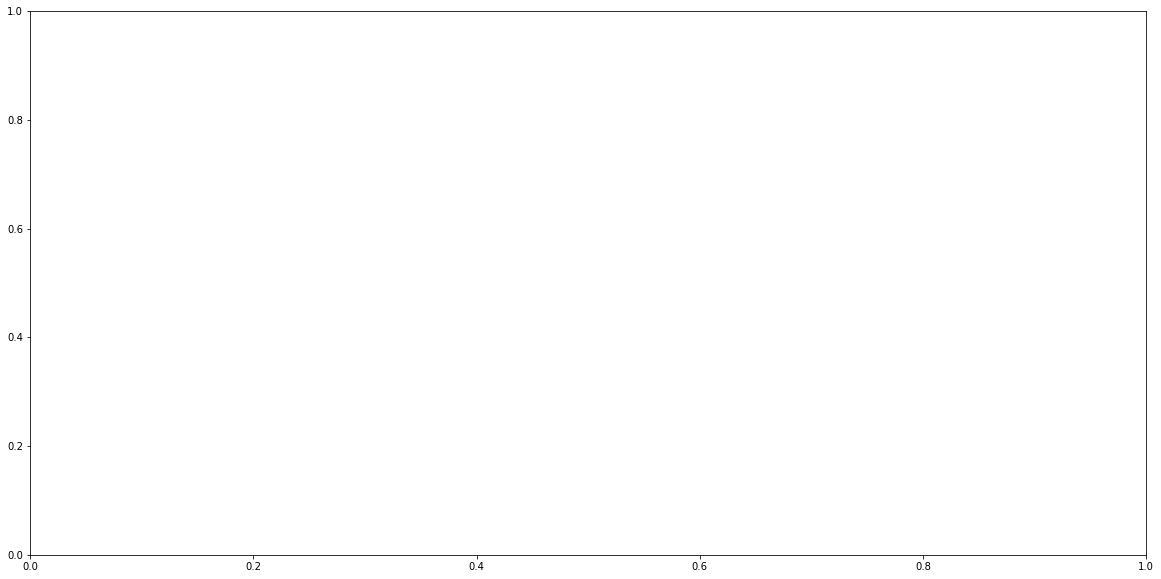

In [36]:
fig, ax = plt.subplots(figsize=(20,10))
x = np.linspace(0,10,25)
y = x**2
y2 = x**3

# The matplotlib API
plt.plot(x,y, x,y2)
plt.show()

And it's really as simple as that. Well, almost - this plot clearly needs some work. Before we go into how to use this as a tool for data exploration, let's talk quickly about presentation-worthiness. 

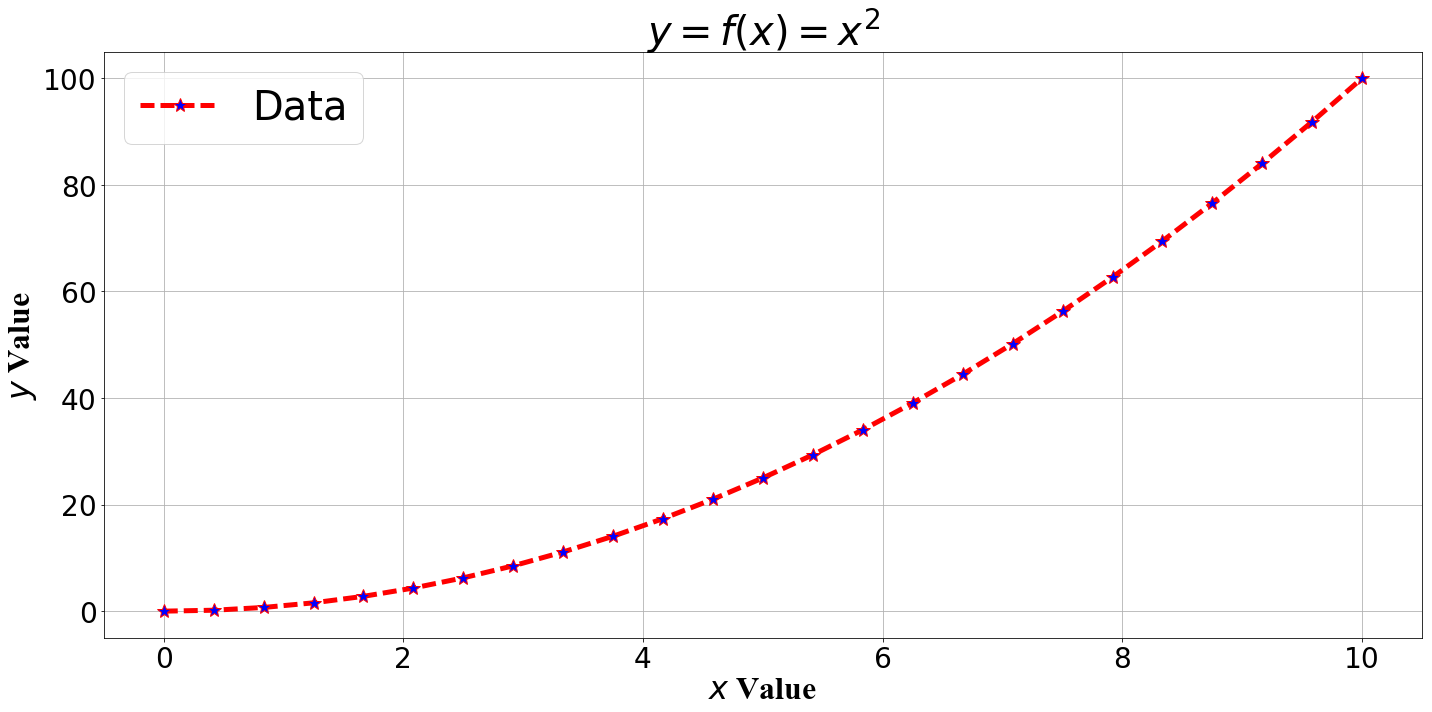

In [37]:
fig, ax = plt.subplots(figsize=(20,10))

plt.plot(x,y,
         lw=5, 
         ls='--',
         color='r', 
         marker='*',
         markersize=15,
         markerfacecolor='b',
         label='Data')
plt.xlabel(r'$x$ Value', fontname='Times New Roman', fontsize=32)
plt.ylabel(r'$y$ Value', fontname='Times New Roman', fontsize=32)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.title('$y = f(x) = x^2$', fontname='Times New Roman', fontsize=40)
plt.grid(True)
plt.legend(loc='upper left', fontsize=40)
plt.tight_layout()
plt.show()

It's sometimes nice to obsess a little bit over how your plots look. It's good practice paying attention to detail and it has huge payoff when you end up presenting your findings to other analysts and business parteners. Here's a more complex example of using the matplotlib api:

In [23]:
markers = ['o','v','^','*','s']
styles = ['-','--','-.',':','-']
colors = ['#588C7E', '#F2E394','#F2AE72','#D96459','#8C4646']

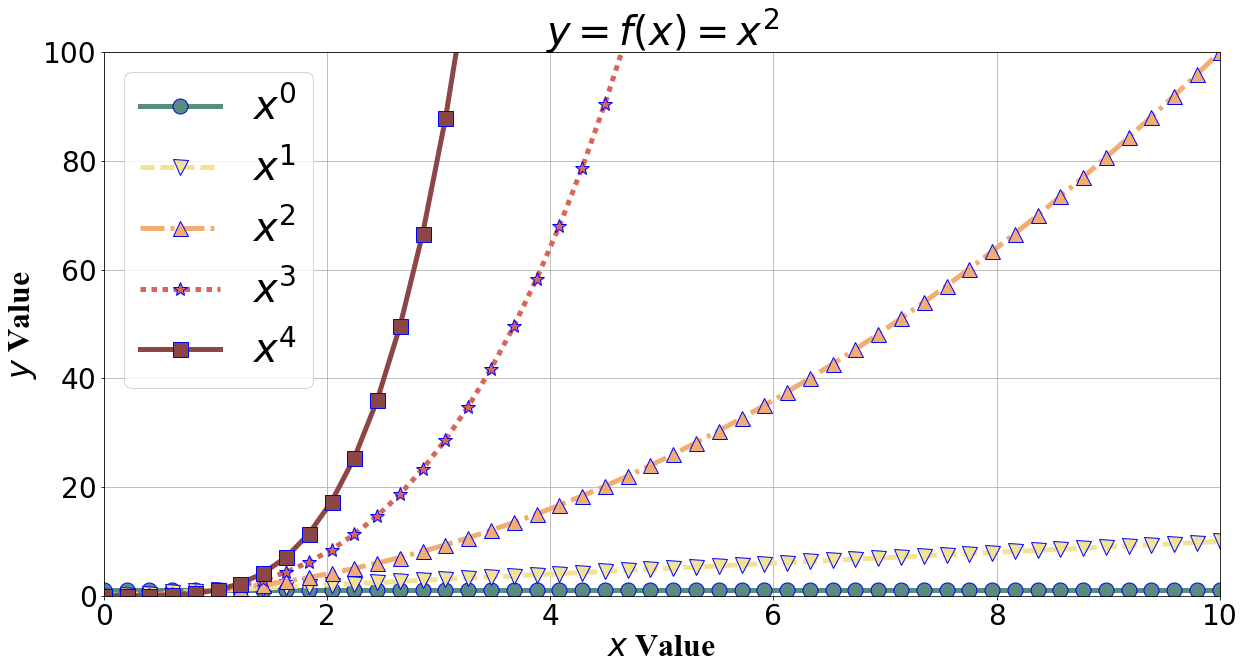

In [24]:
x = np.linspace(0,10,50)
fig, ax = plt.subplots(figsize=(20,10))
for i in range(5):
    plt.plot(x, x**i,
             lw = 5,
             ls = styles[i],
             color=colors[i],
             marker=markers[i],
             markersize=15,
             markerfacecolor=colors[i],
             markeredgecolor='b',
             label=r'$x^{%s}$' % i)
plt.xlim(0,10,50)
plt.ylim(0,100)
plt.xlabel(r'$x$ Value', fontname='Times New Roman', fontsize=32)
plt.ylabel(r'$y$ Value', fontname='Times New Roman', fontsize=32)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.title('$y = f(x) = x^2$', fontname='Times New Roman', fontsize=40)
plt.grid(True)
plt.legend(loc='upper left', fontsize=40)


### 3-D Plotting

Without going into too much detail, here's a quick example of the type of 3-D plotting that's possible with matplotlib (example stolen from the official docs):

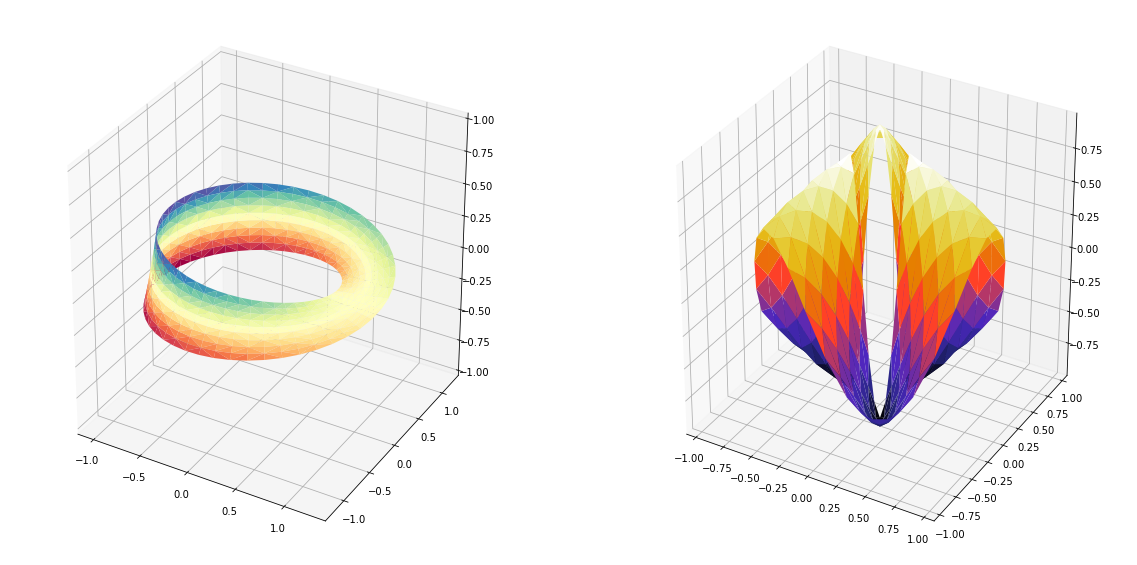

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri

fig = plt.figure(figsize=(20,10))

#============
# First plot
#============

# Make a mesh in the space of parameterisation variables u and v
u = np.linspace(0, 2.0 * np.pi, endpoint=True, num=50)
v = np.linspace(-0.5, 0.5, endpoint=True, num=10)
u, v = np.meshgrid(u, v)
u, v = u.flatten(), v.flatten()

# This is the Mobius mapping, taking a u, v pair and returning an x, y, z
# triple
x = (1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u)
y = (1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
z = 0.5 * v * np.sin(u / 2.0)

# Triangulate parameter space to determine the triangles
tri = mtri.Triangulation(u, v)

# Plot the surface.  The triangles in parameter space determine which x, y, z
# points are connected by an edge.
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.Spectral)
ax.set_zlim(-1, 1)


#============
# Second plot
#============

# Make parameter spaces radii and angles.
n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi/n_angles

# Map radius, angle pairs to x, y, z points.
x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
z = (np.cos(radii)*np.cos(angles*3.0)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = mtri.Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = np.where(xmid**2 + ymid**2 < min_radius**2, 1, 0)
triang.set_mask(mask)

# Plot the surface.
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_trisurf(triang, z, cmap=plt.cm.CMRmap)


plt.show()



### Histograms

While line plots are great for visualizing trends in time series data, histograms are the king of visualizing distributions. Often, the distribution of a variable is what you're interested in, and a visualization provides a lot more information than a group of summary statistics.

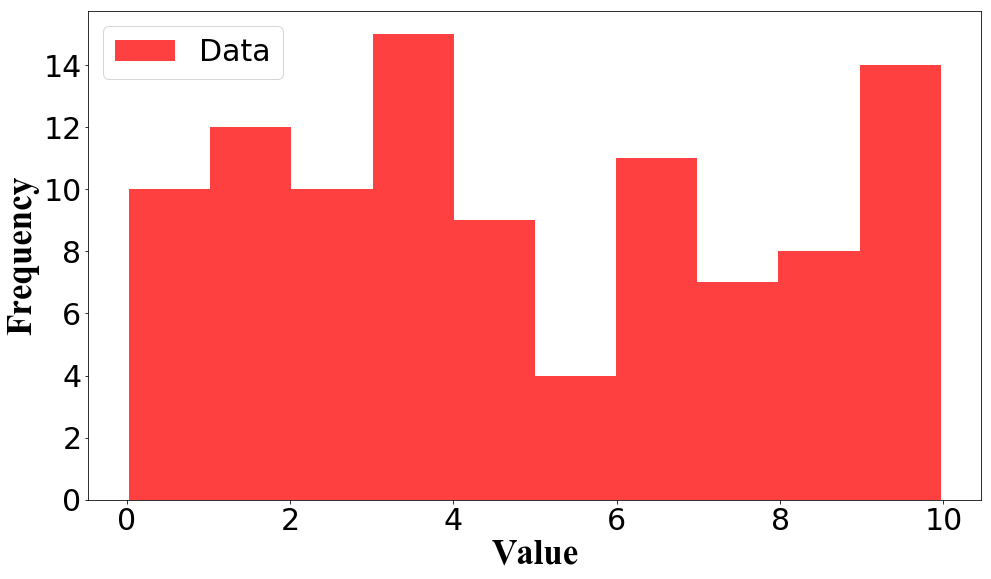

In [31]:
fig, ax = plt.subplots(figsize=(16,9))
data = np.random.uniform(0,10,100)
plt.hist(data, label='Data', color='r', alpha=0.75)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Value', fontname='Times New Roman', fontsize=35)
plt.ylabel('Frequency', fontname='Times New Roman', fontsize=35)
plt.legend(loc='upper left', fontsize=30)
plt.show()

In [32]:
mystery_df = make_mystery_dataframe()
mystery_df.head()

,ages,customer_id,state
0,23.500373,111792,New York
1,56.907798,113005,California
2,47.990284,102993,New York
3,32.931794,117003,New York
4,50.533725,101176,California


(array([-20.,   0.,  20.,  40.,  60.,  80.]),
 <a list of 6 Text xticklabel objects>)

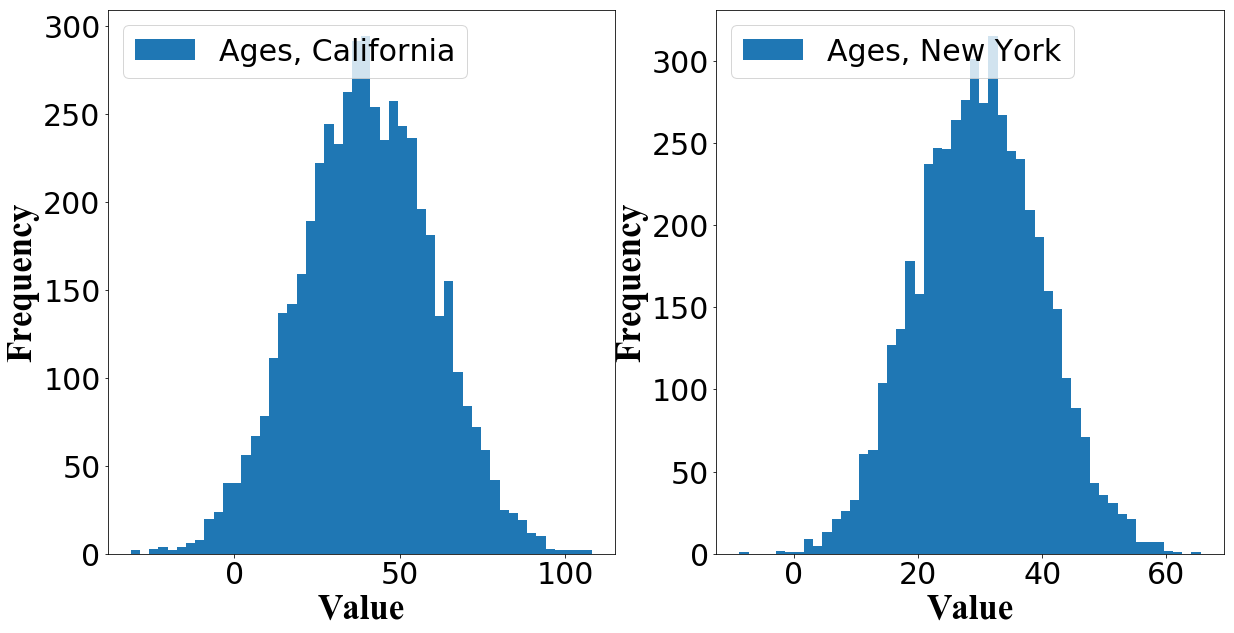

In [33]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.hist(mystery_df[mystery_df['state'] == 'California']['ages'], 
         bins=50,
         label='Ages, California')

ax1.set_xlabel('Value', fontname='Times New Roman', fontsize=35)
ax1.set_ylabel('Frequency', fontname='Times New Roman', fontsize=35)
ax1.tick_params(axis='both', labelsize=30)
ax1.legend(loc='upper left', fontsize=30)


ax2.hist(mystery_df[mystery_df['state'] == 'New York']['ages'],
         bins=50,
         label='Ages, New York')
ax2.set_xlabel('Value', fontname='Times New Roman', fontsize=35)
ax2.set_ylabel('Frequency', fontname='Times New Roman', fontsize=35)
ax2.tick_params(axis='both', labelsize=30)
ax2.legend(loc='upper left', fontsize=30)

plt.xticks(fontsize=30)

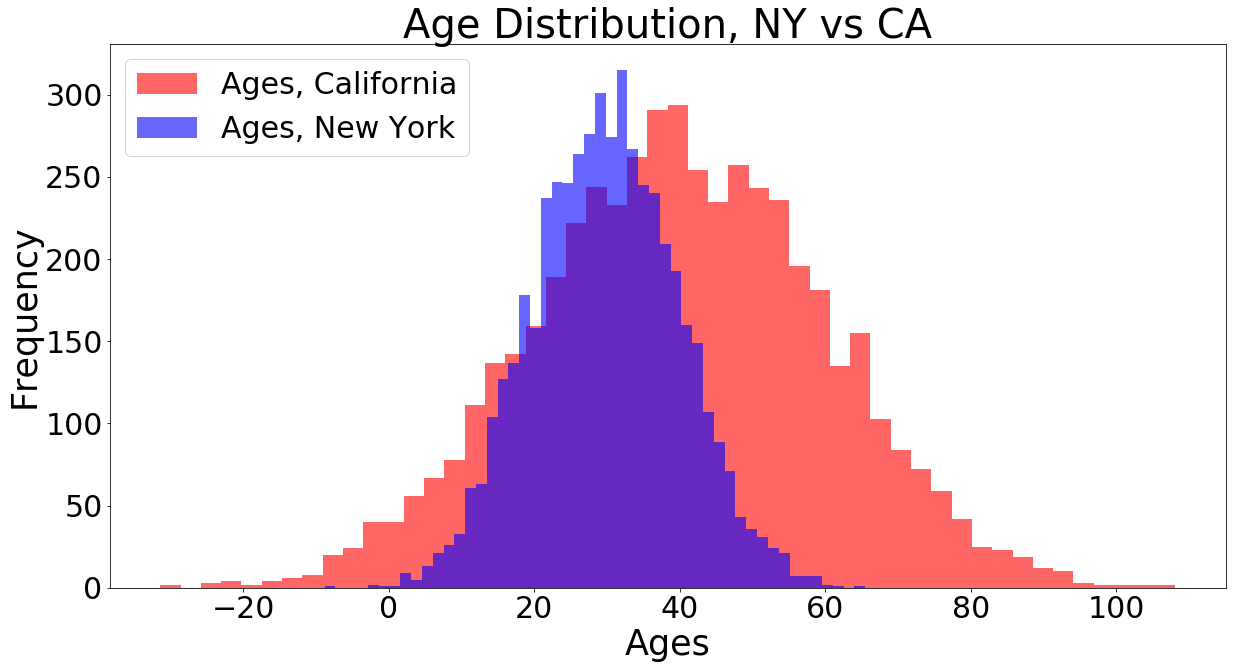

In [34]:
fig, ax = plt.subplots(figsize=(20,10))
plt.hist(mystery_df[mystery_df['state'] == 'California']['ages'], 
         bins=50,
         label='Ages, California',
         color='r',
         alpha=0.6)
plt.hist(mystery_df[mystery_df['state'] == 'New York']['ages'],
         bins=50,
         label='Ages, New York',
         color='b',
         alpha=0.6)

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc='upper left', fontsize=30)
plt.xlabel('Ages', fontsize=35)
plt.ylabel('Frequency', fontsize=35)
plt.title('Age Distribution, NY vs CA', fontsize=40)